In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A partir de la muestra se conseguirá la población del conjunto de datos

Algunos datos de distribución de variables que no constaban en la muestra han sido sacados del estudio affinity de adopciones 2022 "Él nunca lo haría": https://www.fundacion-affinity.org/observatorio/infografia-el-nunca-lo-haria-abandono-adopcion-perros-gatos-espana-2022

In [77]:
data= pd.read_excel("animales_apalarioja.xlsx")

In [3]:
data

,Nombre,Tipo de animal,Fecha de Entrada,Fecha de nacimiento,Nombre de ultimo estado,Fecha de ultimo estado
0,Bambi,Podenco,2022-06-01,2020-01-01,Adoptado,2023-02-20
1,Wanda,Mestizo,2022-06-06,2021-02-02,En adopción,2022-06-17
2,Tiger,Galgo,2022-06-06,2020-06-06,Adoptado,2022-12-17
3,Verdi,Mestizo,2022-06-20,2017-01-01,En adopción,2022-07-01
4,Carla,Mestizo,2022-06-20,2020-07-07,En adopción,2022-07-01
...,...,...,...,...,...,...
416,Morita,Mestizo,2023-03-20,2022-03-20,En periodo legal de recuperación,2023-03-20
417,Drako,Mestizo,2023-03-21,2023-03-21,En periodo legal de recuperación,2023-03-21
418,20230322-001,Alano Español,2023-03-22,2022-12-22,En periodo legal de recuperación,2023-03-22
419,20230322-002,Alano Español,2023-03-22,2022-12-22,En periodo legal de recuperación,2023-03-22


Selecciono únicamente los datos de los animales en cuyo estado figure 'Adoptado'

In [78]:
data_1 = data.loc[data['Nombre de ultimo estado'] == 'Adoptado']

In [79]:
data_1

,Nombre,Tipo de animal,Fecha de Entrada,Fecha de nacimiento,Nombre de ultimo estado,Fecha de ultimo estado
0,Bambi,Podenco,2022-06-01,2020-01-01,Adoptado,2023-02-20
2,Tiger,Galgo,2022-06-06,2020-06-06,Adoptado,2022-12-17
5,Trixie,Mestizo,2022-06-20,2021-01-01,Adoptado,2022-12-13
6,Zelenski,Mestizo,2022-06-20,2020-07-22,Adoptado,2022-11-08
7,Cheryl,Mestizo,2022-06-20,2020-01-01,Adoptado,2023-02-12
...,...,...,...,...,...,...
384,Jack,Ratonero Bodeguero Andaluz,2023-02-19,2022-07-20,Adoptado,2023-03-07
385,Kupel,Mestizo,2023-02-19,2022-02-19,Adoptado,2023-03-15
389,Hilka,Mestizo,2023-02-23,2022-12-10,Adoptado,2023-03-08
390,Freyja,Husky Siberiano,2023-02-24,2022-10-05,Adoptado,2023-02-24


Los datos de este conjunto deben tener los siguientes atributos:
- Id_animal
- Id_centro
- Raza
- Especie
- Sexo
- Tamaño
- Microchip
- Tiempo en protectora
- Edad

Convierto la muestra en lo que quiero (si es necesario) y en cada paso lo extrapolo a la población: 

In [6]:
columnas_poblacion= ['id_animal', 'id_centro', 'Raza', 'Especie', 'Sexo', 'Tamaño', 'Microchip', 'Tiempo', 'Edad']

In [7]:
poblacion=  pd.DataFrame(columns=columnas_poblacion)

###### 1. Raza

In [8]:
data_1['Tipo de animal'].unique()

array(['Podenco', 'Galgo', 'Mestizo', 'Pastor Belga', 'Pastor Vasco',
       'Malinois', 'Border Collie', 'Setter', 'Pointer', 'Europeo Común',
       'Yorkshire Terrier', 'Pastor Alemán', 'Spaniel',
       'Golden Retriever', 'Teckel', 'Setter Irlandés', 'Setter Inglés',
       'Mastín', 'Ratonero Bodeguero Andaluz', 'Husky Siberiano'],
      dtype=object)

In [9]:
data_1['Tipo de animal'] = data_1['Tipo de animal'].replace('Europeo Común', 'Gato')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10844\440511818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Tipo de animal'] = data_1['Tipo de animal'].replace('Europeo Común', 'Gato')


In [10]:
data_1.columns = data_1.columns.str.replace('Tipo de animal', 'Raza')

In [11]:
unique_vals_raza, counts_raza = np.unique(data_1['Raza'], return_counts=True)

In [12]:
unique_vals_raza

array(['Border Collie', 'Galgo', 'Gato', 'Golden Retriever',
       'Husky Siberiano', 'Malinois', 'Mastín', 'Mestizo',
       'Pastor Alemán', 'Pastor Belga', 'Pastor Vasco', 'Podenco',
       'Pointer', 'Ratonero Bodeguero Andaluz', 'Setter', 'Setter Inglés',
       'Setter Irlandés', 'Spaniel', 'Teckel', 'Yorkshire Terrier'],
      dtype=object)

In [13]:
counts_raza

array([  3,   2,   4,   1,   1,   2,   1, 113,   3,   2,   2,   7,   8,
         1,   6,   1,   1,   2,   1,   2], dtype=int64)

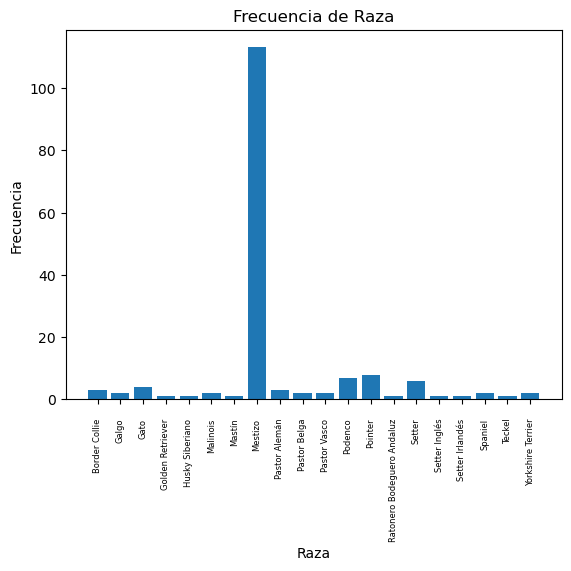

In [14]:
# Crear el gráfico de barras
plt.bar(unique_vals_raza , counts_raza)

# Añadir etiquetas
plt.title('Frecuencia de Raza')
plt.xlabel('Raza')
plt.ylabel('Frecuencia')

plt.xticks(rotation=90)

# Ajusta el espaciado y tamaño de las etiquetas del eje x
plt.tick_params(axis='x', which='major', labelsize=6, pad=10)

# Mostrar el gráfico
plt.show()

In [15]:
# POBLACIÓN
poblacion['Raza'] = np.random.choice(unique_vals_raza, size=500000, p=counts_raza/len(data_1))

###### 2. Especie

In [17]:
def evaluar_raza(raza):
    if raza == 'Gato':
        return 'Felina'
    else:
        return 'Canina'

In [18]:
poblacion['Especie'] = poblacion['Raza'].apply(evaluar_raza)

In [20]:
poblacion['Especie'].value_counts()['Felina']

12180

###### 3. Sexo

Este dato no lo da el informe, y tampoco consta como variable en la muestra. Podría analizarse el nombre del animal en la muestra para decidir si este pertenece a un macho a una hembra pero sería bastante arriesgado.

Por ello se cogerán las frecuencias de la población de animales en adopción:

In [25]:
muestra_adopcion= pd.read_excel("muestra_adopcion.xlsx")

In [23]:
unique_vals_sexo = ['Hembra', 'Macho']
counts_sexo=np.array([62, 68])

In [26]:
poblacion['Sexo'] = np.random.choice(unique_vals_sexo, p=counts_sexo/len(muestra_adopcion), size=len(poblacion))

###### 4. Tamaño

Las proporciones serán sacadas del estudio, solamente serán aplicadas a los perros ya que se entiende que los gatos sean todos de tamaño pequeño:

In [28]:
poblacion.loc[poblacion['Especie'] == 'Felina', 'Tamaño'] = 'Pequeño'

In [33]:
unique_vals_tamaño_canina= ['Pequeño', 'Mediano','Grande']

In [34]:
probabilidad_tamaño_canina= [0.19,0.53,0.28]

In [38]:
poblacion.loc[poblacion['Especie'] == 'Canina', 'Tamaño'] = np.random.choice(unique_vals_tamaño_canina,p=probabilidad_tamaño_canina, size=len(poblacion.loc[poblacion['Especie'] == 'Canina']))

In [39]:
poblacion

,id_animal,id_centro,Raza,Especie,Sexo,Tamaño,Microchip,Tiempo,Edad
0,NaN,NaN,Mestizo,Canina,Hembra,Mediano,NaN,NaN,NaN
1,NaN,NaN,Mestizo,Canina,Macho,Pequeño,NaN,NaN,NaN
2,NaN,NaN,Mestizo,Canina,Hembra,Pequeño,NaN,NaN,NaN
3,NaN,NaN,Pastor Belga,Canina,Hembra,Mediano,NaN,NaN,NaN
4,NaN,NaN,Mestizo,Canina,Hembra,Mediano,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
499995,NaN,NaN,Mestizo,Canina,Macho,Mediano,NaN,NaN,NaN
499996,NaN,NaN,Mestizo,Canina,Hembra,Mediano,NaN,NaN,NaN
499997,NaN,NaN,Mestizo,Canina,Hembra,Mediano,NaN,NaN,NaN
499998,NaN,NaN,Mestizo,Canina,Macho,Mediano,NaN,NaN,NaN


In [40]:
unique_vals_tamaño, counts_tamaño = np.unique(poblacion['Tamaño'], return_counts=True)

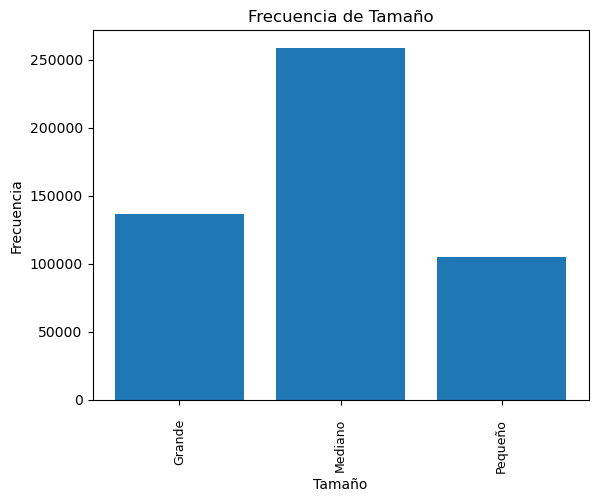

In [41]:
# Crear el gráfico de barras
plt.bar(unique_vals_tamaño, counts_tamaño)

# Añadir etiquetas
plt.title('Frecuencia de Tamaño')
plt.xlabel('Tamaño')
plt.ylabel('Frecuencia')

plt.xticks(rotation=90)

# Ajusta el espaciado y tamaño de las etiquetas del eje x
plt.tick_params(axis='x', which='major', labelsize=9, pad=10)

# Mostrar el gráfico
plt.show()

###### 5. Microchip

Las proporciones serán sacadas del estudio, el cual dice que el 89% de los perros lleva microchip y el 51% de los gatos también:

In [42]:
unique_vals_microchip_canina= [True, False]
probabilidad_microchip_canina= [0.89,(1-0.89)]

In [43]:
poblacion.loc[poblacion['Especie'] == 'Canina', 'Microchip'] = np.random.choice(unique_vals_microchip_canina,p=probabilidad_microchip_canina, size=len(poblacion.loc[poblacion['Especie'] == 'Canina']))

In [44]:
unique_vals_microchip_felina= [True, False]
probabilidad_microchip_felina= [0.51,(1-0.51)]

In [45]:
poblacion.loc[poblacion['Especie'] == 'Felina', 'Microchip'] = np.random.choice(unique_vals_microchip_felina,p=probabilidad_microchip_felina, size=len(poblacion.loc[poblacion['Especie'] == 'Felina']))

###### 6. Tiempo (en protectora)

In [104]:
def calcular_tiempo_permanencia(df, fecha_entrada, fecha_salida, nueva_columna):
    df[fecha_entrada] = pd.to_datetime(df[fecha_entrada])
    df[fecha_salida] = pd.to_datetime(df[fecha_salida])
    df[nueva_columna] = ((df[fecha_salida] - df[fecha_entrada]).dt.days / 30).astype(int)
    df[nueva_columna] = df[nueva_columna].apply(lambda x: f"{int(x/12)} año{'s' if int(x/12) > 1 else ''} y {int(x%12)} mes{'es' if int(x%12) > 1 else ''}")
    
    return df

In [105]:
data_2 = calcular_tiempo_permanencia(data_1, 'Fecha de Entrada', 'Fecha de ultimo estado', 'Tiempo')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10844\3925216888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fecha_entrada] = pd.to_datetime(df[fecha_entrada])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10844\3925216888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fecha_salida] = pd.to_datetime(df[fecha_salida])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10844\3925216888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [106]:
data_2

,Nombre,Tipo de animal,Fecha de Entrada,Fecha de nacimiento,Nombre de ultimo estado,Fecha de ultimo estado,Tiempo
0,Bambi,Podenco,2022-06-01,2020-01-01,Adoptado,2023-02-20,0 año y 8 meses
2,Tiger,Galgo,2022-06-06,2020-06-06,Adoptado,2022-12-17,0 año y 6 meses
5,Trixie,Mestizo,2022-06-20,2021-01-01,Adoptado,2022-12-13,0 año y 5 meses
6,Zelenski,Mestizo,2022-06-20,2020-07-22,Adoptado,2022-11-08,0 año y 4 meses
7,Cheryl,Mestizo,2022-06-20,2020-01-01,Adoptado,2023-02-12,0 año y 7 meses
...,...,...,...,...,...,...,...
384,Jack,Ratonero Bodeguero Andaluz,2023-02-19,2022-07-20,Adoptado,2023-03-07,0 año y 0 mes
385,Kupel,Mestizo,2023-02-19,2022-02-19,Adoptado,2023-03-15,0 año y 0 mes
389,Hilka,Mestizo,2023-02-23,2022-12-10,Adoptado,2023-03-08,0 año y 0 mes
390,Freyja,Husky Siberiano,2023-02-24,2022-10-05,Adoptado,2023-02-24,0 año y 0 mes


In [107]:
unique_vals_tiempo, counts_tiempo = np.unique(data_2['Tiempo'], return_counts=True)

In [108]:
unique_vals_tiempo= unique_vals_tiempo.tolist()
unique_vals_tiempo

['0 año y 0 mes',
 '0 año y 1 mes',
 '0 año y 2 meses',
 '0 año y 3 meses',
 '0 año y 4 meses',
 '0 año y 5 meses',
 '0 año y 6 meses',
 '0 año y 7 meses',
 '0 año y 8 meses']

In [109]:
counts_tiempo= counts_tiempo.tolist()
counts_tiempo

[75, 37, 23, 11, 12, 1, 1, 1, 2]

Según los datos del estudio Affinity, el tiempo medio de los animales en un centro de protección animal efectivamente se encuentra entre los 3 y los 9 meses, pero para los datos de la muestra es necesario introducir outliers porque hay casos en los que un animal pueda llegar a permanecer hasta años en un centro:

In [110]:
outliers = np.random.choice(np.arange(9, 37), size=50, replace=True)
outliers = [f"{int(x/12)} año{'s' if int(x/12) > 1 else ''} y {int(x%12)} mes{'es' if int(x%12) > 1 else ''}" for x in outliers]

In [111]:
# Combinar valores existentes con outliers
unique_vals_tiempo.extend(outliers)
counts_tiempo.extend([1] * len(outliers)) # Asumiendo 5 outliers en este ejemplo

In [112]:
unique_vals_tiempo

['0 año y 0 mes',
 '0 año y 1 mes',
 '0 año y 2 meses',
 '0 año y 3 meses',
 '0 año y 4 meses',
 '0 año y 5 meses',
 '0 año y 6 meses',
 '0 año y 7 meses',
 '0 año y 8 meses',
 '0 año y 10 meses',
 '1 año y 9 meses',
 '1 año y 3 meses',
 '0 año y 11 meses',
 '2 años y 7 meses',
 '1 año y 11 meses',
 '2 años y 7 meses',
 '2 años y 6 meses',
 '0 año y 11 meses',
 '1 año y 0 mes',
 '1 año y 0 mes',
 '3 años y 0 mes',
 '2 años y 4 meses',
 '1 año y 11 meses',
 '0 año y 10 meses',
 '0 año y 9 meses',
 '1 año y 6 meses',
 '1 año y 10 meses',
 '1 año y 10 meses',
 '0 año y 10 meses',
 '2 años y 10 meses',
 '2 años y 11 meses',
 '1 año y 9 meses',
 '2 años y 3 meses',
 '1 año y 11 meses',
 '1 año y 4 meses',
 '2 años y 4 meses',
 '1 año y 6 meses',
 '1 año y 4 meses',
 '3 años y 0 mes',
 '3 años y 0 mes',
 '0 año y 10 meses',
 '0 año y 11 meses',
 '2 años y 9 meses',
 '1 año y 10 meses',
 '1 año y 11 meses',
 '1 año y 3 meses',
 '2 años y 5 meses',
 '0 año y 11 meses',
 '1 año y 6 meses',
 '1 

In [113]:
counts_tiempo

[75,
 37,
 23,
 11,
 12,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [118]:
# counts_tiempo pasa de tener 9 valores a 59
poblacion['Tiempo'] = np.random.choice(unique_vals_tiempo, p=np.array(counts_tiempo)/sum(counts_tiempo), size=len(poblacion))

In [119]:
poblacion

,id_animal,id_centro,Raza,Especie,Sexo,Tamaño,Microchip,Tiempo,Edad
0,NaN,NaN,Mestizo,Canina,Hembra,Mediano,False,0 año y 3 meses,NaN
1,NaN,NaN,Mestizo,Canina,Macho,Pequeño,True,0 año y 2 meses,NaN
2,NaN,NaN,Mestizo,Canina,Hembra,Pequeño,True,0 año y 0 mes,NaN
3,NaN,NaN,Pastor Belga,Canina,Hembra,Mediano,False,0 año y 4 meses,NaN
4,NaN,NaN,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,NaN
...,...,...,...,...,...,...,...,...,...
499995,NaN,NaN,Mestizo,Canina,Macho,Mediano,True,0 año y 0 mes,NaN
499996,NaN,NaN,Mestizo,Canina,Hembra,Mediano,True,1 año y 3 meses,NaN
499997,NaN,NaN,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,NaN
499998,NaN,NaN,Mestizo,Canina,Macho,Mediano,True,1 año y 6 meses,NaN


###### 7. Edad

Lo que voy a hacer es generar edades aleatorias con el formato "x años y x meses" para los animales, siempre teniendo en cuenta de que las edades tienen que ser mayores al tiempo que llevan en adopción:

In [120]:
# Convertir la columna "Tiempo" en meses
poblacion['Tiempo_meses'] = poblacion['Tiempo'].apply(lambda x: int(x.split()[0])*12 + int(x.split()[3]))

In [121]:
# Función para generar una edad aleatoria (en meses) mayor que el tiempo de adopción
def generar_edad(tiempo_meses):
    edad_meses = np.random.randint(0, 169)  # Edad aleatoria entre 0 y 168 meses (14 años)
    while edad_meses <= tiempo_meses:
        edad_meses = np.random.randint(0, 169)
    return edad_meses

In [123]:
# Aplicar la función al df para generar la edad aleatoria
poblacion['Edad_meses'] = poblacion['Tiempo_meses'].apply(generar_edad)

In [124]:
# Convertir la columna "Edad_meses" en el formato que quiero que tenga (x años y x meses)
poblacion['Edad'] = poblacion['Edad_meses'].apply(lambda x: f"{int(x/12)} año{'s' if int(x/12) > 1 else ''} y {int(x%12)} mes{'es' if int(x%12) > 1 else ''}")

In [125]:
# Eliminar columnas que no me interesan
poblacion.drop(['Tiempo_meses', 'Edad_meses'], axis=1, inplace=True)

In [126]:
poblacion

,id_animal,id_centro,Raza,Especie,Sexo,Tamaño,Microchip,Tiempo,Edad
0,NaN,NaN,Mestizo,Canina,Hembra,Mediano,False,0 año y 3 meses,3 años y 1 mes
1,NaN,NaN,Mestizo,Canina,Macho,Pequeño,True,0 año y 2 meses,3 años y 7 meses
2,NaN,NaN,Mestizo,Canina,Hembra,Pequeño,True,0 año y 0 mes,11 años y 6 meses
3,NaN,NaN,Pastor Belga,Canina,Hembra,Mediano,False,0 año y 4 meses,1 año y 0 mes
4,NaN,NaN,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,3 años y 10 meses
...,...,...,...,...,...,...,...,...,...
499995,NaN,NaN,Mestizo,Canina,Macho,Mediano,True,0 año y 0 mes,9 años y 2 meses
499996,NaN,NaN,Mestizo,Canina,Hembra,Mediano,True,1 año y 3 meses,2 años y 7 meses
499997,NaN,NaN,Mestizo,Canina,Hembra,Mediano,True,0 año y 0 mes,9 años y 9 meses
499998,NaN,NaN,Mestizo,Canina,Macho,Mediano,True,1 año y 6 meses,10 años y 10 meses
